<a href="https://colab.research.google.com/github/evaalonsoortiz/7t-spine-coil/blob/main/7t_spine_coil_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7T ACDC Spine Coil

This Colab notebook is a demo for 7T ACDC Spine Coil Evaluation

#Setup

To setup, we will install clone the 7t-spine-coil repo. 


In [12]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [19]:
#! git clone https://github.com/evaalonsoortiz/7t-spine-coil

#! pip install transforms3d
#! pip install wquantiles

! git clone https://github.com/spinalcordtoolbox/spinalcordtoolbox
%cd spinalcordtoolbox
%ls
!install_sct

Cloning into 'spinalcordtoolbox'...
remote: Enumerating objects: 56190, done.
remote: Counting objects: 100% (823/823), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 56190 (delta 597), reused 652 (delta 513), pack-reused 55367
Receiving objects: 100% (56190/56190), 116.45 MiB | 33.70 MiB/s, done.
Resolving deltas: 100% (31651/31651), done.
/home/jovyan/spinalcordtoolbox/spinalcordtoolbox/spinalcordtoolbox
batch_processing.sh*  dev/            LICENSE           spinalcordtoolbox/
CHANGES.md            documentation/  MANIFEST.in       testing/
CODE_OF_CONDUCT.md    flirtsch/       README.rst        tests/
conftest.py           install/        requirements.txt  unit_testing/
contrib/              install_sct*    setup.cfg
CONTRIBUTING.rst      issues/         setup.py
/bin/bash: install_sct: command not found


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import nibabel as nib
import sys
import os
from os.path import join

base_path = os.getcwd() 
parent_dirs = os.path.split(base_path)

base_path
parent_dirs

('/home', 'jovyan')

# Plot

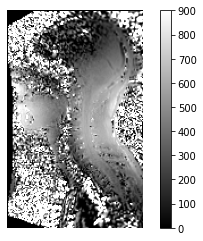

In [6]:
#! cd ../7t-spine-coil

img = nib.load('TFL_SAG_2MMISO_384MM_REFV_0008/TFL_SAG_2MMISO_384MM_REFV_0008_tfl_sag_2mmISO_384mm_REFV_20210408113743_8.nii')

data = img.get_fdata()
data.shape
imgplot = plt.imshow(np.rot90(data[:,:,28]))
imgplot.set_cmap('gray')
plt.axis('off')
plt.colorbar()
plt.clim(0,900)
plt.show()

In [7]:
# Folder/filename config
#parent_dirs = os.path.split(base_path)
#t2s_folder_relative = os.path.join('7t-spine-coil/TFL_SAG_2MMISO_384MM_REFV_0007')
#qc_path = os.path.join(base_path, 'qc')

#t2s = 'TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_384mm_REFV_20210408113743_7'

#file_ext = '.nii.gz'

# Segment spinal cord
#!sct_deepseg_sc -i {t1s+file_ext} -c t2s -qc {qc_path}


! sct_deepseg_sc -i 'TFL_SAG_2MMISO_384MM_REFV_0008/TFL_SAG_2MMISO_384MM_REFV_0008_tfl_sag_2mmISO_384mm_REFV_20210408113743_8.nii' -c t2s -qc qc

/bin/bash: sct_deepseg_sc: command not found


In [16]:
!  sct_extract_metric -i TFL_SAG_2MMISO_384MM_REFV_0008/TFL_SAG_2MMISO_384MM_REFV_0008_tfl_sag_2mmISO_384mm_REFV_20210408113743_8.nii -f TFL_SAG_2MMISO_384MM_REFV_0007/TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_384mm_REFV_20210408113743_7_seg.nii -method wa


--
Spinal Cord Toolbox (5.2.0)

sct_extract_metric -i TFL_SAG_2MMISO_384MM_REFV_0008/TFL_SAG_2MMISO_384MM_REFV_0008_tfl_sag_2mmISO_384mm_REFV_20210408113743_8.nii -f TFL_SAG_2MMISO_384MM_REFV_0007/TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_384mm_REFV_20210408113743_7_seg.nii -method wa
--


Load metric image...
Estimation for label: TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_384mm_REFV_20210408113743_7_seg

Done! To view results, type:
open extract_metric.csv



In [17]:
import pandas as pd

df = pd.read_csv("extract_metric.csv", sep=",")
# shows top 10 rows
df.head(10)

,Timestamp,SCT Version,Filename,Slice (I->S),VertLevel,Label,Size [vox],WA(),STD()
0,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,0,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
1,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,1,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
2,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,2,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
3,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,3,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
4,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,4,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
5,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,5,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
6,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,6,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
7,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,7,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
8,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,8,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
9,2021-05-13 23:20:49,5.2.0,/Users/evaalonsoortiz/Documents/Academic/Postd...,9,NaN,TFL_SAG_2MMISO_384MM_REFV_0007_tfl_sag_2mmISO_...,0,None,None
